In [1]:
# 상위 폴더 경로 가져오기.
from example_base import GetParentPath
# 핑퐁 로봇 제어 모듈 import.
from pingpongthread import PingPongThread

In [2]:
# 1개 로봇을 연결하는 인스턴스 생성.
PingPongThreadInstance = PingPongThread(number=1, group_id=10)
# 로봇 제어 쓰레드 시작.
PingPongThreadInstance.start()
# 모든 로봇이 연결될 때 까지 기다림.
PingPongThreadInstance.wait_until_full_connect()

Found device: USB 직렬 장치(COM11)
Serial connected.
Write data: DD DD 10 DD 00 00 DA 00 0B 00 00
Connected with a master robot.
Fully connected.


In [3]:
# 큐브 ID
cube_ID = 1

In [6]:
# 웹캠 열기.
PingPongThreadInstance.webcam_open(0)
# PingPongThreadInstance.webcam_open("http://192.168.66.1:9527/videostream.cgi?loginuse=admin&loginpas=admin")

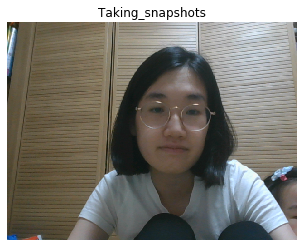

Q hit, closing...


In [7]:
# chapter4\good 폴더 안에 '기분 좋은 감정' 찍기.
PingPongThreadInstance.webcam_take_snapshots("chapter4/good")

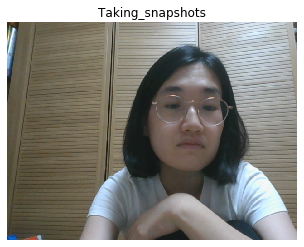

Q hit, closing...


In [8]:
# chapter4\bad 폴더 안에 '기분 나쁜 감정' 찍기.
PingPongThreadInstance.webcam_take_snapshots("chapter4/bad")

In [9]:
# 웹캠 닫기.
PingPongThreadInstance.webcam_close()

In [10]:
# '기분 좋은 감정' 클래스 인스턴스, '기분 나쁜 감정' 클래스 인스턴스 생성.
good = PingPongThreadInstance.ImageClass("good", "chapter4/good")
bad = PingPongThreadInstance.ImageClass("bad", "chapter4/bad")

In [11]:
# 모델 트레이닝. 
# 첫 번째 인수는 저장하는 이름, 두 번째 인수는 knn 알고리즘의 k 값, 세 번째 인수는 모델 모드. 네 번째 인수 이후는 클래스 인스턴스들.
model = PingPongThreadInstance.train_classes("chapter4/gb_model.json", 10, 2, good, bad)

Class good : 33 images.
Class bad : 34 images.
Training done.
chapter4/gb_model.json saved.


In [13]:
# 시간 제어를 위한 모듈 import.
import time
# 키보드 제어를 위한 모듈 import.
import keyboard

print("스페이스 키를 누르고 당신의 감정을 표현해 보세요!")
# 4초 후에 스페이스 바 키를 누르면 루프에서 나감.
time.sleep(4)
while True:
    if keyboard.is_pressed(" "):
        break
    else:
        time.sleep(0.01)

스페이스 키를 누르고 당신의 감정을 표현해 보세요!


In [14]:
# 웹캠 열기.
PingPongThreadInstance.webcam_open(0)
#PingPongThreadInstance.webcam_open("http://192.168.66.1:9527/videostream.cgi?loginuse=admin&loginpas=admin")

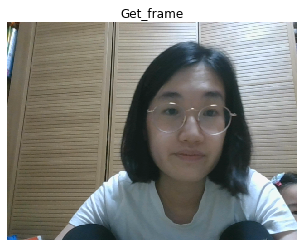

{'good': 1, 'bad': 9}


In [15]:
# now(현재 상태), flag(과거 상태) 초기화
now = 1
flag = 1

# 프레임을 평가하는 인스턴스 생성. 누적 프레임은 3초 동안 보관.
frames_predictor = PingPongThreadInstance.FramesPredictor(model=model, timer_sec=3)
# 감정 인식을 위한 루프.
while True:
    # q를 누르면 종료.
    if keyboard.is_pressed("q"):
        break
    # 주피터 노트북 출력 비우기.
    PingPongThreadInstance.clear_output()
    # 현재 웹캠 프레임을 보여주고 가져오기.
    frame = PingPongThreadInstance.webcam_get_frame(window="Get_frame")
    # 현재 프레임을 평가하고, 평가 내용을 누적.
    frames_prediction = frames_predictor.image_predict_and_accum(frame)
    print(frames_prediction)
    # 누적된 평가 내용.
    accum_prediction = frames_predictor.accum_predict()
    # 누적된 평가 내용이 없으면 돌아가기. 아니면 가장 확률이 높은 클래스 확인.
    if accum_prediction == None:
        max_class = None
        continue
    else:
        print("accum_prediction:", accum_prediction)
        max_class = max(accum_prediction, key=accum_prediction.get)
    
    # '기분 좋은 감정'일 확률이 90% 이상이면 승패 계산.
    if max_class == "good" and accum_prediction[max_class] > 0.9:
        now = 1  
    # '기분 나쁜 감정'일 확률이 90% 이상이면 승패 계산.
    elif max_class == "bad" and accum_prediction[max_class] > 0.9:
        now = 2
    # 모두 아니면 돌아가기.
    else:
        continue
    
    # now(현재 상태)와 flag(과거 상태)가 같으면 pass, 다르면 180도 회전
    if now == flag:
        pass
    else:
        angle = 180/360
        PingPongThreadInstance.run_motor_step(cube_ID, 15, angle)
        time.sleep(angle/15*60)
        flag = now

In [16]:
# 웹캠 닫기.
PingPongThreadInstance.webcam_close()
# 로봇 제어 쓰레드 종료.
PingPongThreadInstance.end()

Master robot is not connected.
Serial disconnected. Sleep 3 seconds.
End thread.
